In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
database_da = df[df["job_title_short"]== "Data Scientist"].copy()

In [3]:
database_da["job_posted_month"] = database_da["job_posted_date"].dt.month



In [7]:
database_DA2 = database_da.explode("job_skills")

pivot = database_DA2.pivot_table(index = 'job_posted_month', columns = "job_skills", aggfunc = "size", fill_value = 0)

pivot.loc["Total"] = pivot.sum()

pivot



job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


In [12]:
pivot = (
    database_da
    .explode("job_skills")
    .pivot_table(
        index='job_posted_month',
        columns='job_skills',
        aggfunc='size',
        fill_value=0
    )
)
pivot.loc["Total"] = pivot.sum(numeric_only=True)

In [16]:
sorted_cols = pivot.loc["Total"].sort_values(ascending=False).index
pivot = pivot[sorted_cols]

pivot = pivot.drop("Total")

pivot



KeyError: 'Total'

In [17]:
pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,esquisse,workfront,play framework,wimi,shogun,mattermost,nuxt.js,sqlserver
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,13998,9811,7566,3842,3446,3253,3222,2582,2316,2132,...,0,0,0,0,0,0,0,0,0,0
2,9551,6600,5064,2644,2566,2089,2085,1716,1525,1453,...,0,0,1,0,0,0,0,0,0,0
3,9210,6374,4971,2480,2456,2092,1992,1727,1405,1440,...,0,0,0,1,0,0,1,0,0,0
4,9135,6270,4873,2444,2447,2055,1905,1665,1546,1456,...,0,2,0,0,0,0,0,0,0,0
5,8029,5583,4228,2244,2271,1921,1716,1442,1271,1202,...,0,0,0,0,0,0,0,0,0,0
6,9338,6473,5019,2282,2432,2173,2072,1739,1580,1324,...,0,1,1,0,0,0,0,0,0,0
7,9400,6678,5029,2300,2547,2207,1972,1845,1535,1425,...,1,0,0,0,0,0,0,0,0,0
8,11193,8026,6089,3100,3013,2571,2466,2130,1972,1795,...,0,0,0,0,1,0,0,0,0,0
9,8393,5748,4153,2224,2062,1923,1820,1704,1462,1352,...,3,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Top 5 Skills for Data Scientists Per Month')

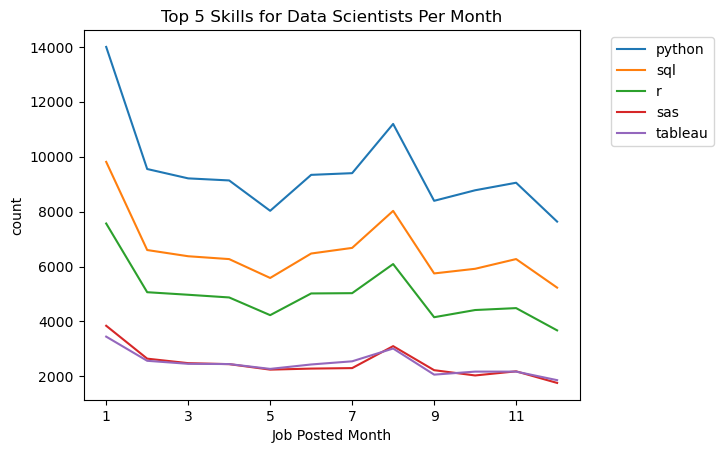

In [21]:
pivot.iloc[:, :5].plot(kind="line")

plt.ylabel("count")
plt.xlabel("Job Posted Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Top 5 Skills for Data Scientists Per Month")
